# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


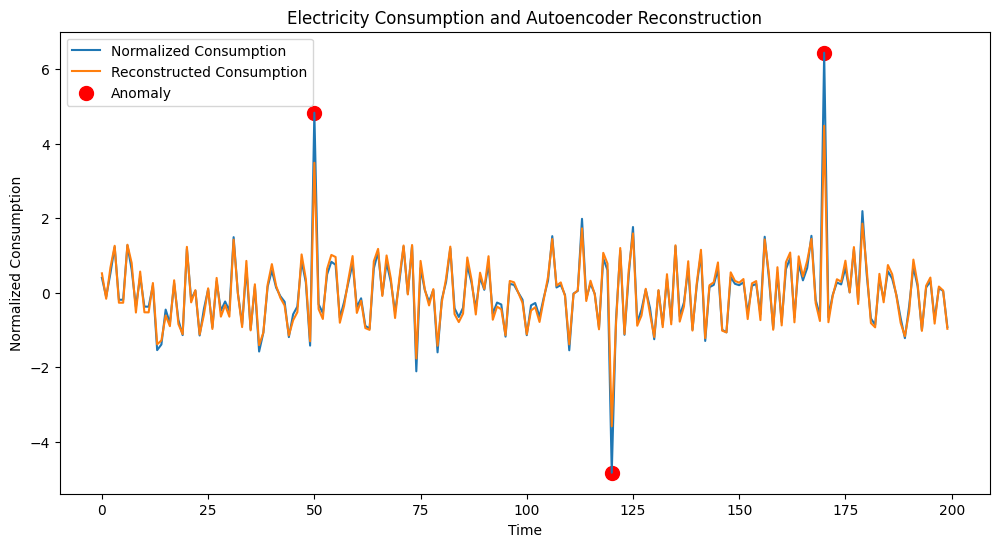

In [4]:
#
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# 1. Generate mock electricity consumption data (normal + anomalies)
np.random.seed(42)
time_steps = 200
normal_data = np.random.normal(loc=100, scale=10, size=time_steps)

# Inject anomalies (spikes and drops)
normal_data[50] = 160
normal_data[120] = 40
normal_data[170] = 180

df = pd.DataFrame({"consumption": normal_data})

# Normalize data
data_mean = df["consumption"].mean()
data_std = df["consumption"].std()
df["consumption_norm"] = (df["consumption"] - data_mean) / data_std

# 2. Build simple Autoencoder
input_dim = 1
encoding_dim = 8

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Prepare data for training (only normal data ideally; here we use all)
X = df["consumption_norm"].values.reshape(-1, 1)

# Train autoencoder
autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

# 3. Reconstruction and anomaly detection
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=1)

# Define threshold for anomaly (e.g., mean + 2*std of mse)
threshold = mse.mean() + 2 * mse.std()
df["anomaly"] = mse > threshold

# 4. Visualization
plt.figure(figsize=(12,6))
plt.plot(df.index, df["consumption_norm"], label="Normalized Consumption")
plt.plot(df.index, reconstructions.flatten(), label="Reconstructed Consumption")
plt.scatter(df.index[df["anomaly"]], df.loc[df["anomaly"], "consumption_norm"], 
            color='red', label="Anomaly", s=100)
plt.title("Electricity Consumption and Autoencoder Reconstruction")
plt.xlabel("Time")
plt.ylabel("Normalized Consumption")
plt.legend()
plt.show()